In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Violinplot
+ Giống Boxplot nhưng hiên thị nhiều thông tin hơn
+ Muốn hiển thị nhiều thông tin hơn thì có thể dùng Violinplot. Nó là sự kết hợp giữa Boxplot và đường Destiny Plot.
+ Destiny là đường cong thể hiện phân bô của dữ liệu, chỗ nào càng phình ra chỗ mật độ điêm càng nhiều
+ Đường cong này tìm được bằng cách sử dụng kĩ thuật KDE - Kernel Destiny Estimation. 
+ Bên trong Violinplot là 1 Boxplot nhỏ, ta có thể điều chỉnh plot showw bên trong Violinplot bằng tham số inner, inner_kwags
+ Các tham số khác thì giống với boxplot

### Simple Violinplot

In [5]:
# Data 
iris = sns.load_dataset('iris')
print(iris.head(10))
print('------------------------')
print(iris.info())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
5           5.4          3.9           1.7          0.4  setosa
6           4.6          3.4           1.4          0.3  setosa
7           5.0          3.4           1.5          0.2  setosa
8           4.4          2.9           1.4          0.2  setosa
9           4.9          3.1           1.5          0.1  setosa
------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    flo

       species          size  result
0       setosa  sepal_length     5.1
1       setosa  sepal_length     4.9
2       setosa  sepal_length     4.7
3       setosa  sepal_length     4.6
4       setosa  sepal_length     5.0
..         ...           ...     ...
595  virginica   petal_width     2.3
596  virginica   petal_width     1.9
597  virginica   petal_width     2.0
598  virginica   petal_width     2.3
599  virginica   petal_width     1.8

[600 rows x 3 columns]
----------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  600 non-null    object 
 1   size     600 non-null    object 
 2   result   600 non-null    float64
dtypes: float64(1), object(2)
memory usage: 14.2+ KB
None
----------------------------------


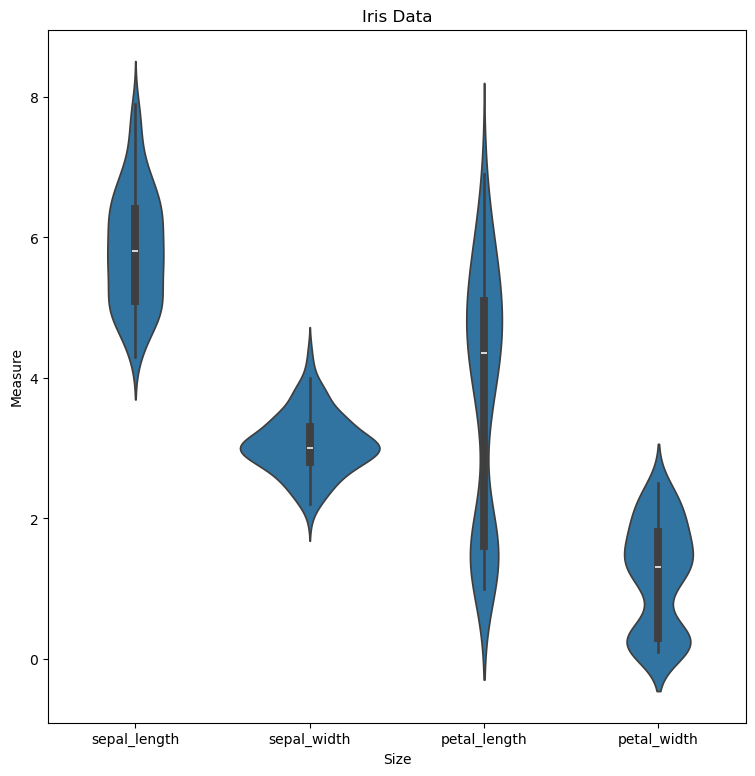

In [6]:
# Biến đổi dữ liệu từ dạng Wide sang Long
data = pd.melt(frame=iris, id_vars=['species'], value_vars= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], var_name='size', value_name='result')
print(data)
print('----------------------------------')
print(data.info())
print('----------------------------------')

fig,ax = plt.subplots(figsize=(9,9))
sns.violinplot(data=data, x='size', y='result')  

ax.set_title('Iris Data')
ax.set_xlabel('Size')
ax.set_ylabel('Measure')
plt.show()


### Grouped Violinplot
+ Có 2 kiểu

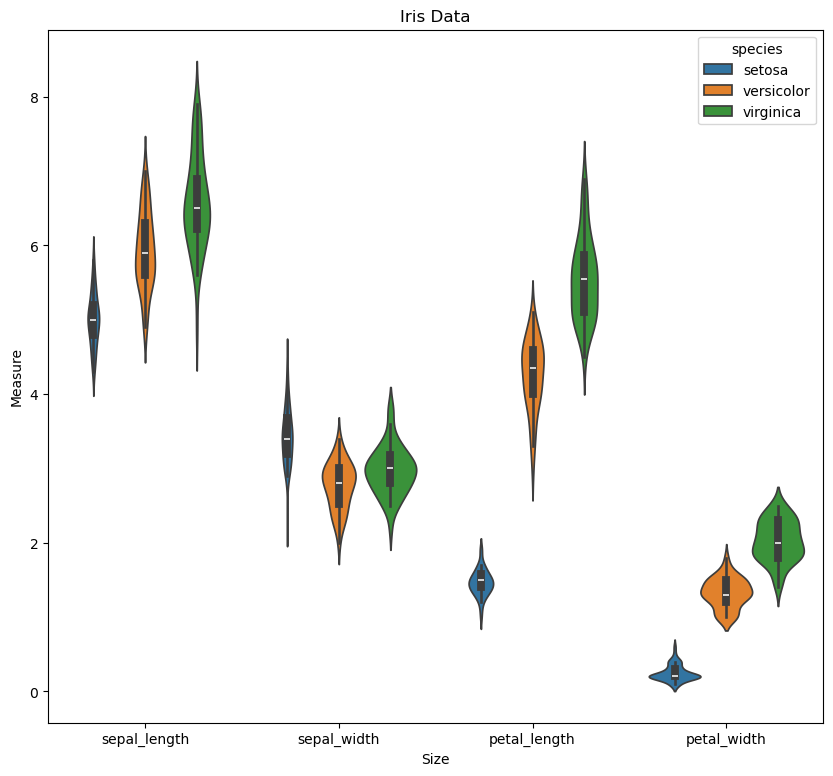

In [7]:
fig,ax = plt.subplots(figsize=(10,9))
sns.violinplot(data=data, x='size', y='result', hue='species')  # sử dụng biến hue

ax.set_title('Iris Data')
ax.set_xlabel('Size')
ax.set_ylabel('Measure')
plt.show()


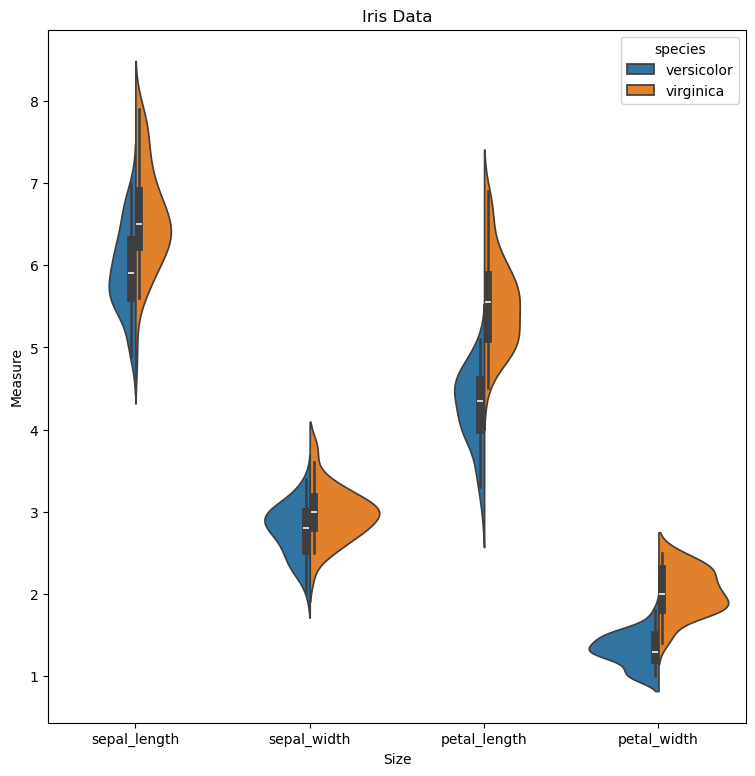

In [14]:
# sử dụng split = True
# kiểu thứ 2 này chỉ áp dụng khi biến hue=a mà a chỉ có 2 giá trị.
# ở ví dụ trên hue='species' mà cột species có 3 giá trị lên không thể vẽ kiểu này được
# Khi vẽ kiểu này trong violin sẽ có 2 boxplot cho 2 phần trái và phải, nhìn sẽ hơi khó chịu tuy nhiên sẽ vô ý nghĩa nếu ta cố gắng hợp chúng thành 1 boxplot.
# Nếu không thích 2 boxplot thì ta có thể đổi sang inner='quart' sẽ dễ nhình hơn


mask = (data.loc[:, 'species'] != 'setosa')  # bỏ đi 1 giá trị trong cột species
data2 = data[mask]

fig,ax = plt.subplots(figsize=(9,9))

sns.violinplot(data=data2, x='size', y='result', hue='species', split=True)   # sử dụng biến split = True

ax.set_title('Iris Data')
ax.set_xlabel('Size')
ax.set_ylabel('Measure')
plt.show()



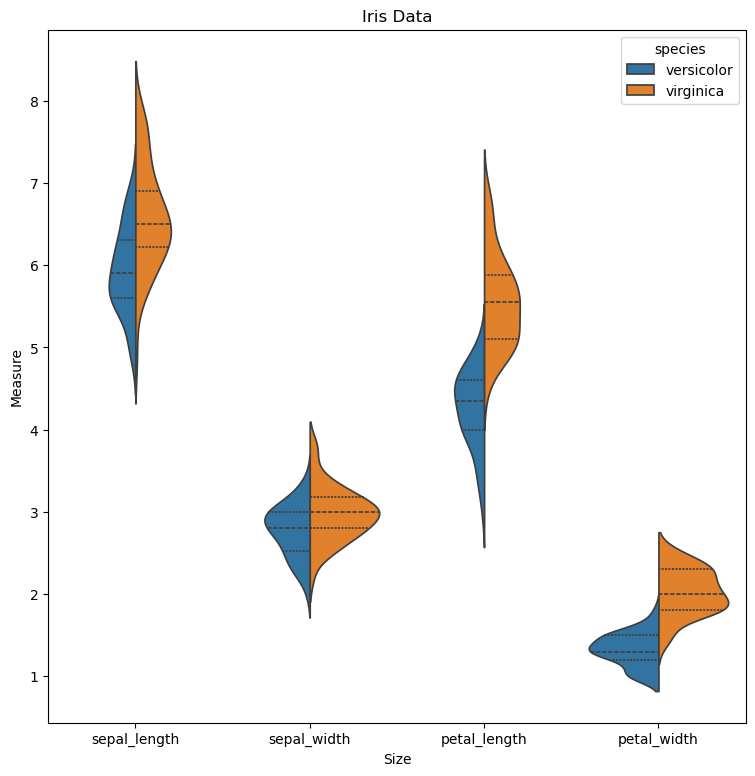

In [16]:
# đổi sang inner = quart cho dễ nhìn
fig,ax = plt.subplots(figsize=(9,9))
sns.violinplot(data=data2, x='size', y='result', hue='species', split=True, inner='quart')   # sử dụng biến split = True

ax.set_title('Iris Data')
ax.set_xlabel('Size')
ax.set_ylabel('Measure')
plt.show()

### inner, inner_kws - Thay đổi biểu đồ bên trong Violinplot 
+ inner có 5 giá trị: {box, quart, point, stick, None} 
    + box: vẽ boxplot bên trong (mặc định inner='box')
    + quart: vẽ các đường mean,Q1,Q2 bên trong 
    + point: vẽ các điểm dữ liệu bên trong bằng hình chấm
    + stick: vẽ các điểm dữ liệu bên trong bằng đường kẻ
+ inner_kws: là các tham số kế thừa từ thằng matplotlib, dùng để chỉnh sửa các plot bên trong violin. Tham số này chủ yếu dùng để chỉnh màu sắc, kích thước của plot bên trong
    + hầu hết ta lên chú ý đến tham số color trong inner_kws
    + box: chú ý đến 3 tham số (box_width, whis_width, marker) - (độ rộng của box, chiều rộng của râu, loại kí hiệu dùng đánh dấu median)

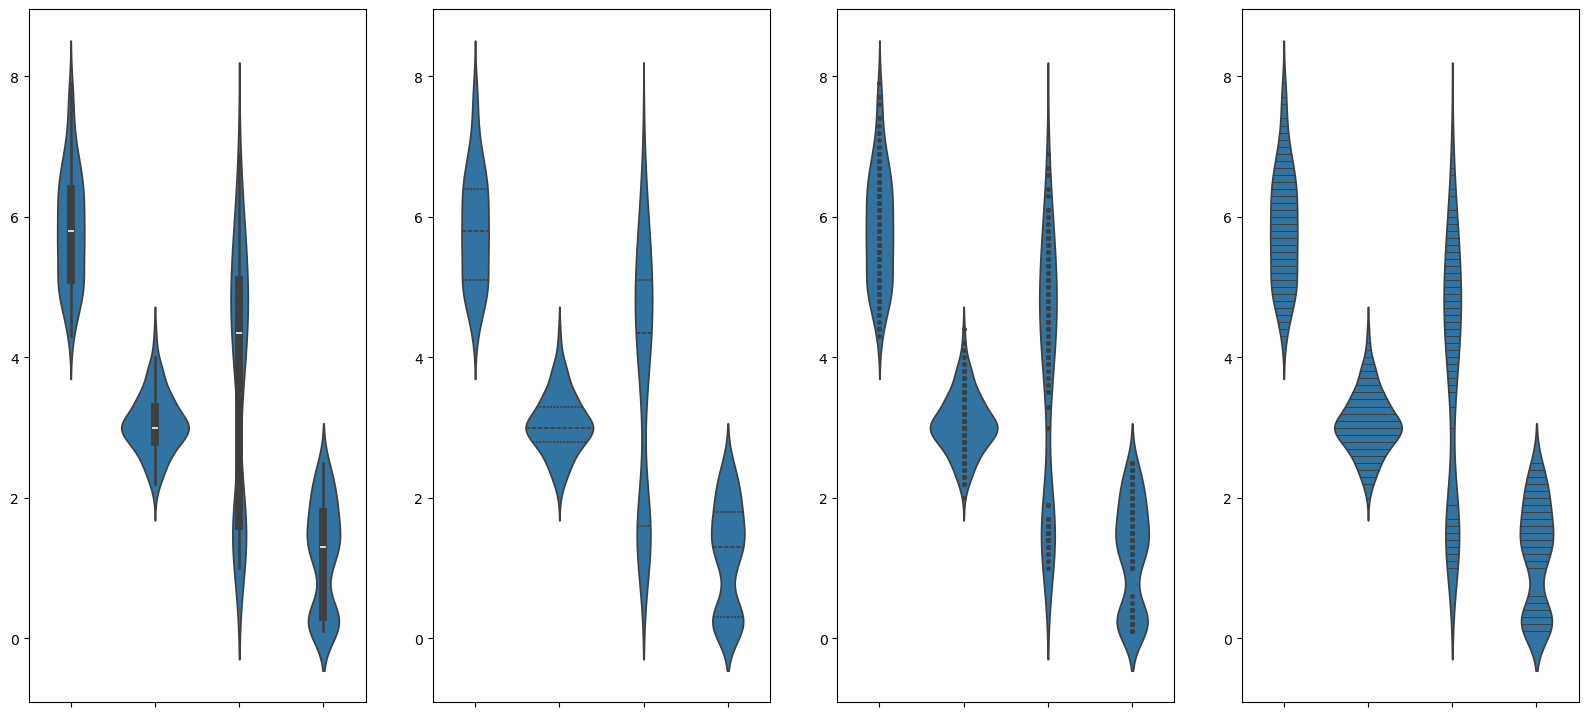

In [20]:
fig,ax = plt.subplots(1, 4, figsize=(20,9))
sns.violinplot(data=data, x='size', y='result', inner='box', ax=ax[0], legend=False)    # box
sns.violinplot(data=data, x='size', y='result', inner='quart', ax=ax[1], legend=False)  # quart 
sns.violinplot(data=data, x='size', y='result', inner='point', ax=ax[2], legend=False)  # point
sns.violinplot(data=data, x='size', y='result', inner='stick', ax=ax[3], legend=False)  # stick

for i in range(4):
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xticklabels('')

plt.show()

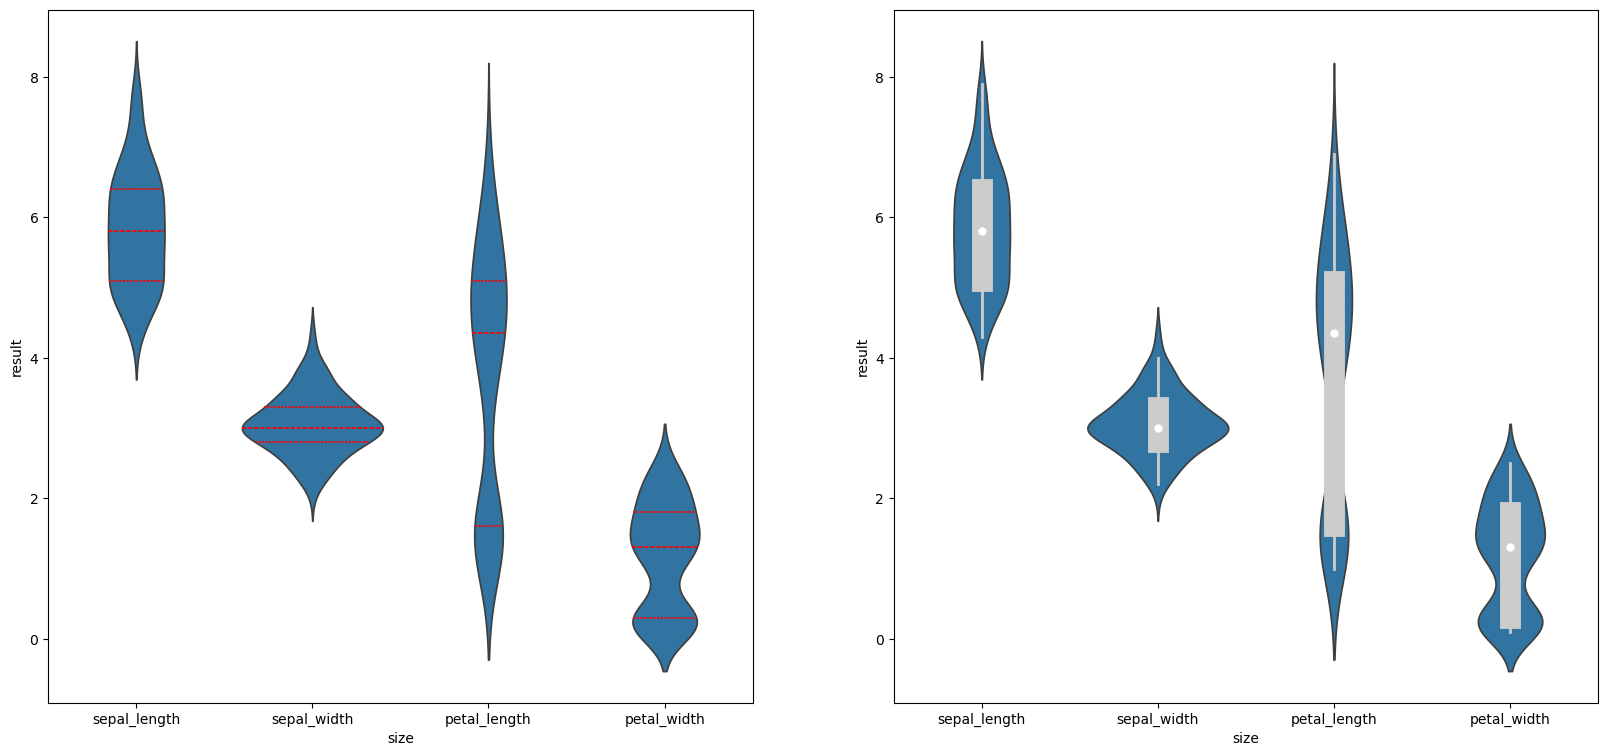

In [77]:
# sử dụng inner_kws

fig,ax = plt.subplots(1,2, figsize = (20,9))

sns.violinplot(data=data, x='size', y='result', inner='quart', inner_kws={'color':'r'}, ax=ax[0])                     # đổi màu sắc 
sns.violinplot(data=data, x="size", y='result', inner_kws=dict(box_width=15, whis_width=2, color=".8", marker='o', markersize='3'), ax=ax[1])     # chỉnh kích thước của box, mau sac

plt.show()


In [ ]:
# gridsize, bw_method, bw_adjust, density_norm
# các tham số này dùng để điều chỉnh cách tình ra đường cong phân phối